In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23942,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


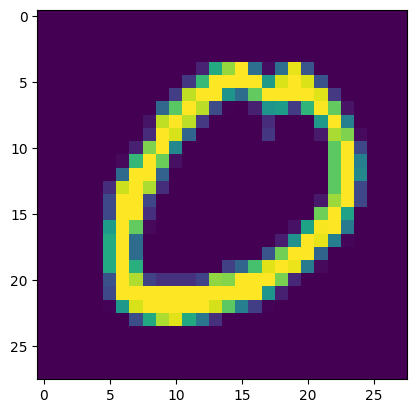

In [5]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [6]:
x= df.iloc[:,1:]
y=df.iloc[:,0]


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(33600, 784)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
import time
start=time.time()
y_pred=knn.predict(x_test)
print(time.time()-start)

11.397960662841797


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [12]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [14]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)
knn = KNeighborsClassifier()

In [15]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [16]:
y_pred=knn.predict(x_test_trf)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9507142857142857

In [18]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(x_train)
    X_test_trf = pca.transform(x_test)

    knn = KNeighborsClassifier()

    knn.fit(x_train_trf,y_train)

    y_pred = knn.predict(x_test_trf)

    print(accuracy_score(y_test,y_pred))

0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857142857
0.9507142857

KeyboardInterrupt: 

In [19]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [20]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [21]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()


In [22]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)


In [23]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [24]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [25]:
pca.explained_variance_
# Eigen values


array([40.67111198, 29.17023401, 26.74459621])

In [26]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [27]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [28]:
pca.explained_variance_.shape

(3,)

In [30]:
pca.components_.shape

(3, 784)

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701])